## 1 - Comprension del negocio

### Porblema: 
    - Predecir la probabilidad de infeccion de un ordenador con Windows

#### Clase: 
    - Supervised Classification 

### Target:
    - HasDetections

## 2 - Entendimiento de Datos

In [49]:
#importar librerias

import numpy as np # linear algebra
import pandas as pd # Series and DataFrames

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

# Importar librerias para el reporting
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

#reparticion de datos
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

#entrenar modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.tree import plot_tree

In [2]:
#URL del fichero
#datos = 'https://drive.google.com/file/d/1ikHxdS6cEUvVBJHWMFdgJHBS9bebEOxs/view?usp=sharing'

In [2]:
#importar datos al dataframe
df = pd.read_csv('../../../Data_FranLlaneza/sample_mmp.csv',index_col=0)
#df = pd.read_csv('sample_mmp.csv',index_col=0,low_memory=False) # para la correccion

/var/folders/_c/hk8dlkj51473mmsqx14j1p9w0000gn/T/ipykernel_1763/1372822341.py:2: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../../Data_FranLlaneza/sample_mmp.csv',index_col=0)


In [4]:
#para ocupar menos espacio en memoria pasamos de float64 a float32 , y de int64 a int8 (pasando de 320 MB a 195 MB )

for c in df.columns:
    t = str(df[c].dtype)
    if t == "float64":
       df[c]=df[c].astype('float32')
    if t == "int64":
      df[c]=df[c].astype('int8')

In [5]:
df.reset_index(drop = True, inplace = True)

### 2.1 Analisis univariante de los datos

In [6]:
#2.1.1 
print("Shape:" , df.shape, '\n')
display(
    df.info(),
    df.nunique()
)

Shape: (500000, 83) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  int8   
 6   RtpStateBitfield                                   498168 non-null  float32
 7   IsSxsPassiveMode                                   500000 non-null  int8   
 8   DefaultBrowsersIdentifier                          2

None

MachineIdentifier                                    500000
ProductName                                               3
EngineVersion                                            53
AppVersion                                               95
AvSigVersion                                           6455
IsBeta                                                    2
RtpStateBitfield                                          7
IsSxsPassiveMode                                          2
DefaultBrowsersIdentifier                               554
AVProductStatesIdentifier                              5516
AVProductsInstalled                                       5
AVProductsEnabled                                         5
HasTpm                                                    2
CountryIdentifier                                       222
CityIdentifier                                        37157
OrganizationIdentifier                                   44
GeoNameIdentifier                       

In [7]:
#2.1.2
display(df.head())

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.00,0,NaN,"53,447.00",...,"19,951.00",0,NaN,0.00,0,0,0.00,0.00,11.00,1
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.00,0,NaN,"53,447.00",...,"48,753.00",0,0.00,0.00,0,0,0.00,1.00,3.00,0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.00,0,NaN,"46,781.00",...,"33,111.00",1,0.00,0.00,1,1,0.00,0.00,15.00,0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.00,0,NaN,"53,447.00",...,"48,473.00",1,NaN,0.00,0,0,0.00,0.00,15.00,1
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.00,0,NaN,"47,238.00",...,"4,343.00",1,NaN,0.00,1,0,0.00,1.00,13.00,1


In [8]:
#2.1.3 + 2.1.4

display(df.describe(include=['object']).T,
    df.describe().T 
)

,count,unique,top,freq
MachineIdentifier,500000,500000,f1cd864e97bae82bdf96523e1a539121,1
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436


,count,mean,std,min,25%,50%,75%,max
IsBeta,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00
RtpStateBitfield,"498,168.00",6.85,1.03,0.00,7.00,7.00,7.00,35.00
IsSxsPassiveMode,"500,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
DefaultBrowsersIdentifier,"24,061.00","1,652.91","1,004.73",1.00,788.00,"1,632.00","2,381.00","3,209.00"
AVProductStatesIdentifier,"498,062.00","47,759.12","14,038.49",3.00,"49,480.00","53,447.00","53,447.00","70,492.00"
AVProductsInstalled,"498,062.00",1.33,0.52,1.00,1.00,1.00,2.00,5.00
AVProductsEnabled,"498,062.00",1.02,0.17,0.00,1.00,1.00,1.00,4.00
HasTpm,"500,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00
CountryIdentifier,"500,000.00",2.48,75.80,-128.00,-78.00,29.00,66.00,127.00
CityIdentifier,"481,760.00","81,251.65","48,986.71",7.00,"36,825.00","82,373.00","123,939.50","167,958.00"


In [9]:
#2.1.5

display( 
    df.select_dtypes(include=['number']).isnull().sum(),
    df.select_dtypes(include=['object']).isnull().sum()
)

IsBeta                                                    0
RtpStateBitfield                                       1832
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
AutoSampleOptIn                         

MachineIdentifier                        0
ProductName                              0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
PuaMode                             499874
SmartScreen                         178596
Census_MDC2FormFactor                    0
Census_DeviceFamily                      0
Census_ProcessorClass               497918
Census_PrimaryDiskTypeName             709
Census_ChassisTypeName                  37
Census_PowerPlatformRoleName             2
Census_InternalBatteryType          355603
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEd

In [ ]:
# Ademas de todas los datos anteriores, se uso sobretodo el pandas reporting
# Reporting con las variables tratadas --> mini-->5min en vez de 14min
profile_mini = ProfileReport(df, title="Profile report",minimal=True ,correlations={
        "auto": {"calculate": False},
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    })
profile_mini.to_file("analisis_EDA_original.html") 

In [11]:
#2.1.6
df['HasDetections'].value_counts()

0    250047
1    249953
Name: HasDetections, dtype: int64

<AxesSubplot:xlabel='HasDetections', ylabel='count'>

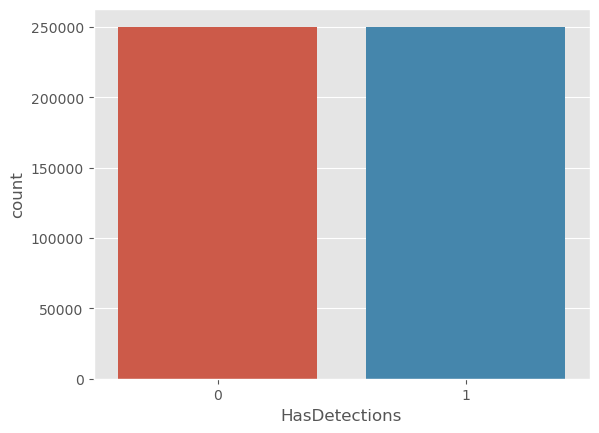

In [12]:
sns.countplot(data=df, x='HasDetections')

In [13]:
#2.1.7

df.pivot_table(
    index='AppVersion', 
    values='HasDetections', 
    aggfunc=[len, sum, np.mean]).sort_values(by=[('len','HasDetections')], ascending = False).head()



,len,sum,mean
,HasDetections,HasDetections,HasDetections
AppVersion,,,
4.18.1807.18075,288809,"152,973.00",0.53
4.18.1806.18062,47641,"23,108.00",0.49
4.12.16299.15,20197,"9,207.00",0.46
4.10.209.0,15292,"7,771.00",0.51
4.13.17134.1,14414,"7,579.00",0.53


<AxesSubplot:xlabel='AppVersion', ylabel='count'>

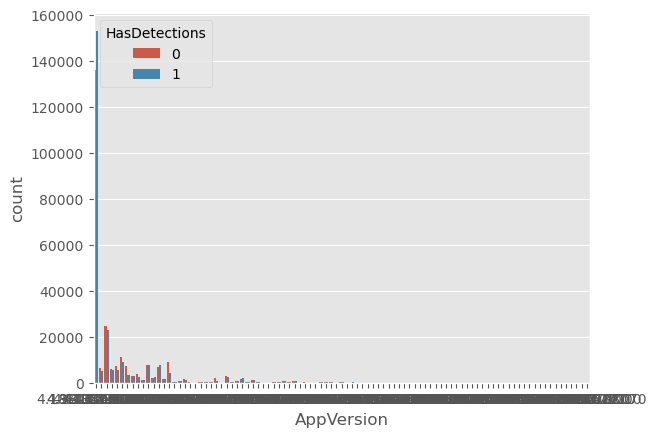

In [14]:
# 2.1.9 Correlacion de variables con el target
sns.countplot(data=df, x='AppVersion', hue='HasDetections') #hue : colorea por una variable

In [15]:
df.pivot_table(index='EngineVersion'
    , values='HasDetections'
    , aggfunc=[len, sum, np.mean]).sort_values(by=[('len','HasDetections')], ascending = False).head()

,len,sum,mean
,HasDetections,HasDetections,HasDetections
EngineVersion,,,
1.1.15200.1,216491,"106,453.00",0.49
1.1.15100.1,205494,"113,557.00",0.55
1.1.15000.2,14752,"5,041.00",0.34
1.1.14901.4,11984,"3,670.00",0.31
1.1.14600.4,9005,"3,986.00",0.44


<AxesSubplot:>

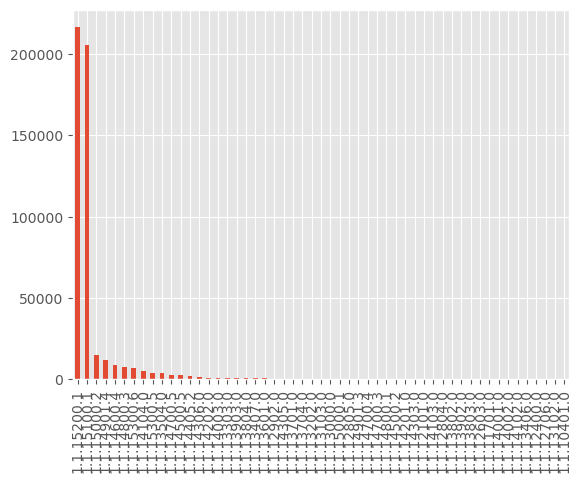

In [16]:
df['EngineVersion'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='EngineVersion', ylabel='count'>

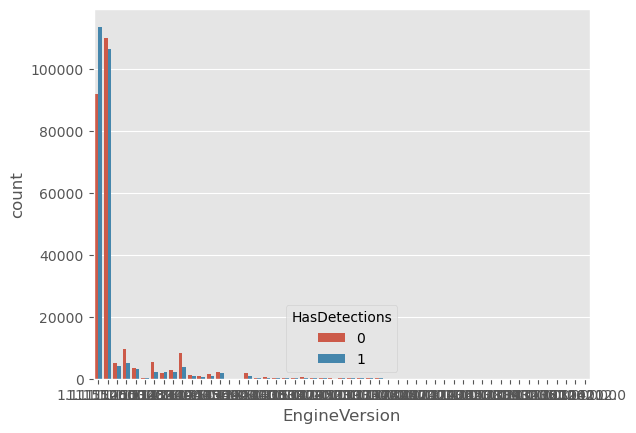

In [17]:
sns.countplot(data=df, x='EngineVersion', hue='HasDetections') #hue : colorea por una variable

In [18]:
df.pivot_table(index='AppVersion'
    , values='HasDetections'
    , aggfunc=[len, sum, np.mean]).sort_values(by=[('len','HasDetections')], ascending = False).head()

,len,sum,mean
,HasDetections,HasDetections,HasDetections
AppVersion,,,
4.18.1807.18075,288809,"152,973.00",0.53
4.18.1806.18062,47641,"23,108.00",0.49
4.12.16299.15,20197,"9,207.00",0.46
4.10.209.0,15292,"7,771.00",0.51
4.13.17134.1,14414,"7,579.00",0.53


<AxesSubplot:xlabel='AppVersion', ylabel='count'>

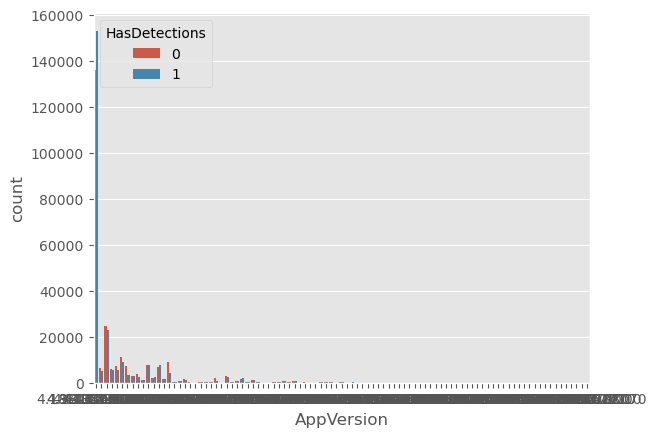

In [19]:
sns.countplot(data=df, x='AppVersion', hue='HasDetections') #hue : colorea por una variable

<AxesSubplot:xlabel='Census_IsPenCapable', ylabel='count'>

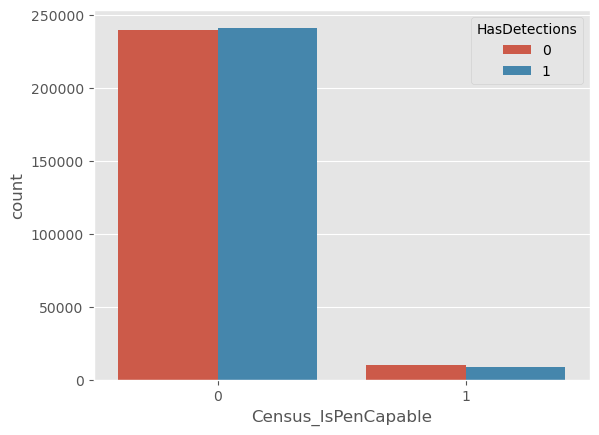

In [20]:
sns.countplot(data=df, x='Census_IsPenCapable', hue='HasDetections') 

<AxesSubplot:>

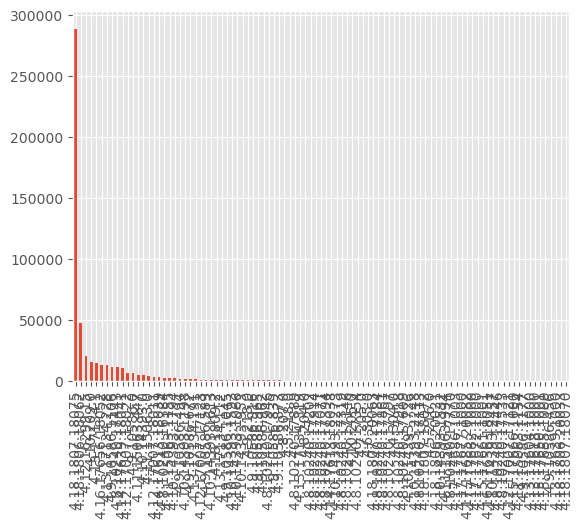

In [21]:
df['AppVersion'].value_counts().plot(kind='bar')



<AxesSubplot:xlabel='CountryIdentifier', ylabel='count'>

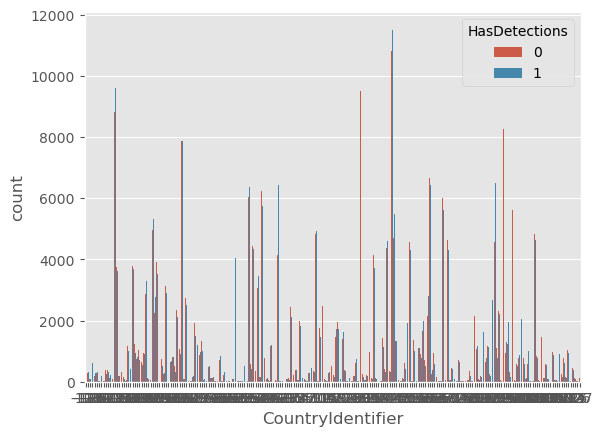

In [22]:
sns.countplot(data=df, x='CountryIdentifier', hue='HasDetections') #hue : colorea por una variable

<AxesSubplot:ylabel='AVProductsInstalled'>

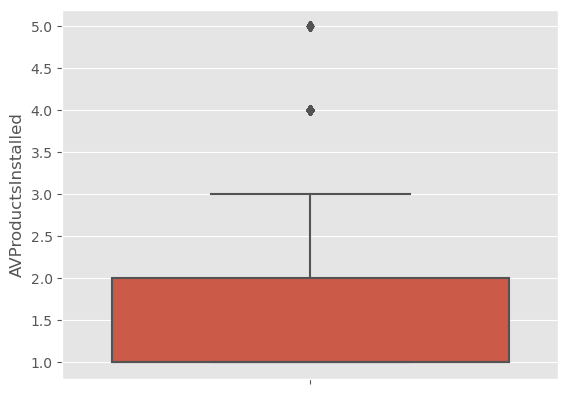

In [23]:
#2.1.11
sns.boxplot(data=df, y='AVProductsInstalled')

<AxesSubplot:ylabel='Frequency'>

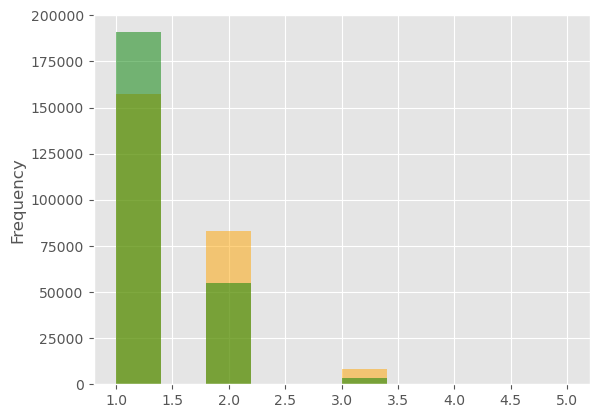

In [24]:
df[df.HasDetections == 0]['AVProductsInstalled'].plot(kind='hist', alpha=.5, color="orange")
df[df.HasDetections == 1]['AVProductsInstalled'].plot(kind='hist', alpha=.5, color="green")

In [24]:
#funcion para ver 2 graficas, un count, y el count con la variable destino positiva
def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))
    
    #en una única grafica de 2x1 en el primer slot
    ax1 = sns.countplot(
        dataframe[column],
        order = list(dataframe[column].unique())
    )

    plt.show()

/Users/usuario/opt/anaconda3/envs/Nuclio/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


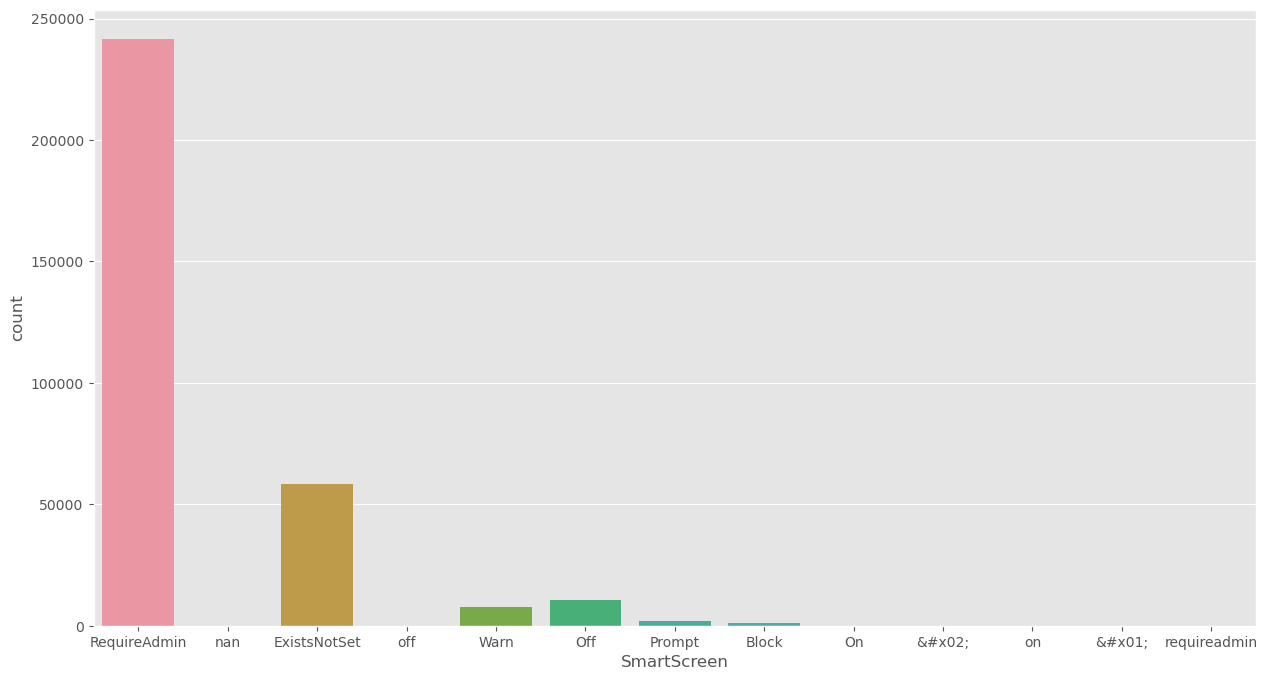

In [25]:
plot_cat_values(df, 'SmartScreen', 'HasDetections')

<AxesSubplot:xlabel='SmartScreen', ylabel='count'>

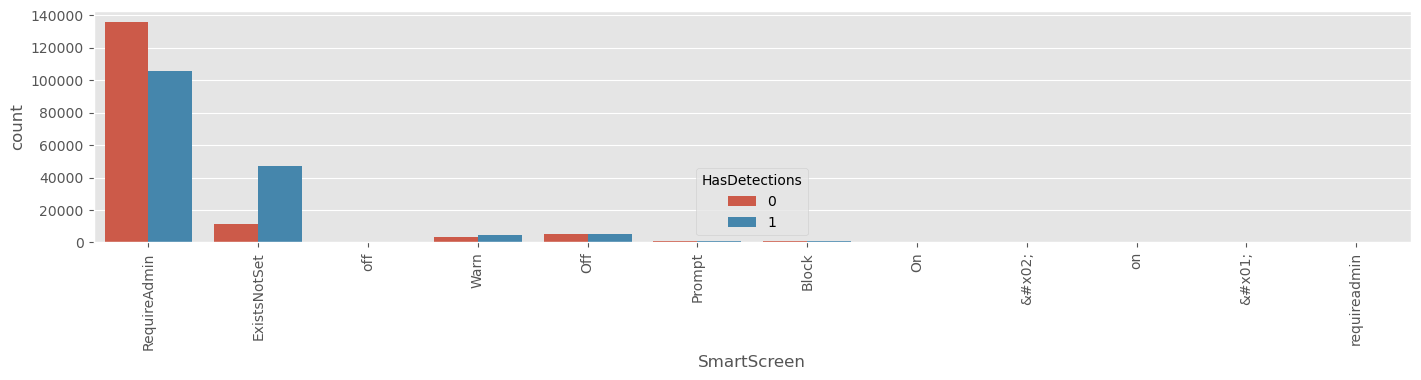

In [26]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='SmartScreen', hue='HasDetections')

## 3 - Preparacion de los datos
### 3.1 Limpieza de atributos

In [27]:
#en un primera iteracion habia eleminado todas las census, en esta dejo las siguientes:

df.rename(columns = {'Census_IsPenCapable':'IsPenCapable' 
,'Census_MDC2FormFactor':'MDC2FormFactor' 
,'Census_OEMNameIdentifier':'OEMNameIdentifier'
,'Census_ProcessorManufacturerIdentifier':'ProcessorManufacturerIdentifier'
,'Census_OSArchitecture':'OSArchitecture'
,'Census_OSBranch':'OSBranch'
,'Census_OSWUAutoUpdateOptionsName':'OSWUAutoUpdateOptionsName'
,'Census_GenuineStateName':'GenuineStateName'
,'Census_IsSecureBootEnabled':'IsSecureBootEnabled'
,'Census_IsAlwaysOnAlwaysConnectedCapable':'IsAlwaysOnAlwaysConnectedCapable'
,'Census_ActivationChannel':'ActivationChannel'
,'Census_OSInstallTypeName':'OSInstallTypeName'


}, inplace = True) #para que no se borre las variables "hardware" que voy aprovechas

In [28]:
#eleminar las variables

df.drop (df.filter(like='Census_',axis=1).columns , axis=1,inplace= True) #borrar todo lo Hardware
df.drop (['DefaultBrowsersIdentifier','PuaMode'], axis=1 , inplace= True) #borrar variables con nulls > 95%
df.drop (['ProductName','IsBeta','IsSxsPassiveMode','HasTpm','Platform'
,'OsVer','OsSuite','AutoSampleOptIn','SMode','Firewall','UacLuaenable'], axis=1 , inplace= True) #borrar variables con variaNZA <95%
df.drop (['LocaleEnglishNameIdentifier','GeoNameIdentifier'], axis=1 , inplace= True)  #variables ccorrelacionadas
df.drop (['MachineIdentifier','AvSigVersion','CityIdentifier','CountryIdentifier'], axis=1 , inplace= True) #alta cardinalidad




In [29]:
#rellenar los nulos
numericos = ['AVProductStatesIdentifier','AVProductsEnabled','RtpStateBitfield','AVProductsEnabled'
,'OrganizationIdentifier','OsBuildLab','IsProtected','IeVerIdentifier'
,'SmartScreen','Wdft_IsGamer','Wdft_RegionIdentifier','AVProductsInstalled','OEMNameIdentifier'
,'ProcessorManufacturerIdentifier','IsAlwaysOnAlwaysConnectedCapable']
for x in numericos:
    df[x].fillna(value='-1', inplace=True)

In [30]:
#convertir en categoricas
categ = list(['AppVersion','EngineVersion','OsBuildLab','AVProductStatesIdentifier','Processor','OsPlatformSubRelease'
,'OsBuildLab','SkuEdition','SmartScreen','MDC2FormFactor','OSArchitecture','OSBranch','OSWUAutoUpdateOptionsName','GenuineStateName'
,'OSInstallTypeName','ActivationChannel'])

for x in categ:
    df[x] = pd.Categorical(df[x],categories = df[x].unique())

In [31]:
#convertir en interos
intero = list(['AVProductsEnabled','RtpStateBitfield','AVProductsInstalled','OrganizationIdentifier','OsBuild',
'IsProtected','IeVerIdentifier','AVProductStatesIdentifier','Wdft_IsGamer','Wdft_RegionIdentifier',
'IsPenCapable','OEMNameIdentifier','ProcessorManufacturerIdentifier','IsSecureBootEnabled','IsAlwaysOnAlwaysConnectedCapable'])

for x in intero:
    #print(x)
    df[x] = df[x].astype('int8')

In [32]:
# 3.4 -->Limitar el numero de muestras con menos de 1000 registros
# se ha probado varios (el mas bajo 500) ,pero no mejora la curva AUC,
variable = ['OrganizationIdentifier','OsBuild','OsBuildLab','SkuEdition',
'IeVerIdentifier','SmartScreen','AVProductStatesIdentifier','OEMNameIdentifier','SmartScreen']

for x in variable:
    df_count = (
        df
        [x]
        .value_counts()
        .reset_index(name='conteo')
        .query('conteo<=1000')
        .rename(columns = {'index':x})

    )

df = df.replace({x : {k: 'OTROS' for k in df_count[x].unique()}})

In [33]:
#Otra forma de agrupar (por los primeros x valores)
# se haca para varibles que tiene apenas unos pocos valores predominantes
variable = ['OsBuildLab','EngineVersion','AppVersion']

for x in variable: 
    top_cat = df[x].value_counts().head(10)
    top_cat_list = top_cat.index.to_list()
    top_cat_list.append('OTROS')
    df[x] = pd.Categorical(df[x], categories=top_cat_list)
    df[x].fillna('OTROS', inplace=True)
    df[x].value_counts(dropna=False)

In [ ]:
#reporting con las variables tratadas
profile_mini = ProfileReport(df, title="Profile report",minimal=True,correlations={
        "auto": {"calculate": False},
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    })
profile_mini.to_file("analisis_EDA_tratado.html") 

#### Despues de la limpieza de datos, como quedan algunas variables

<AxesSubplot:xlabel='AppVersion', ylabel='count'>

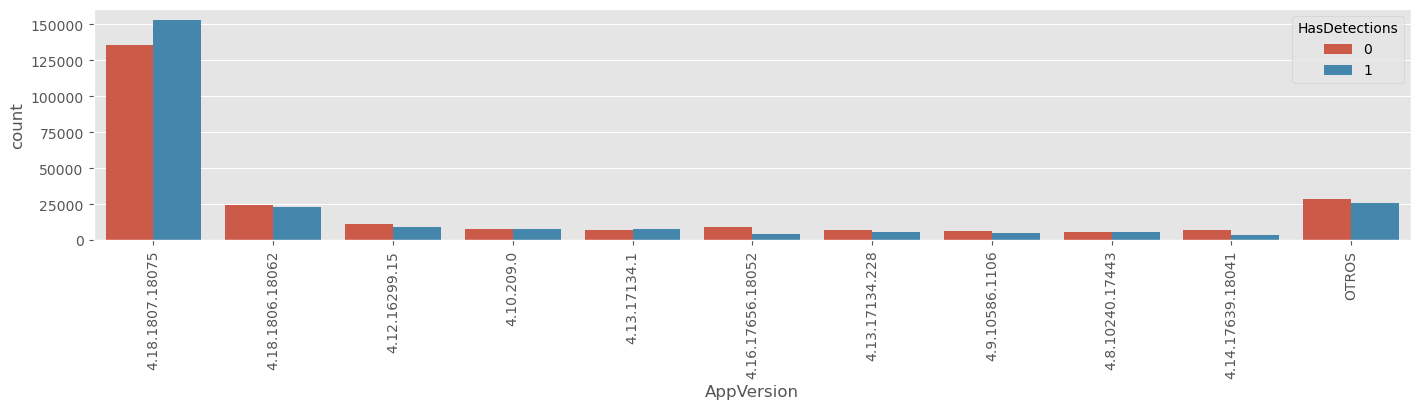

In [34]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='AppVersion', hue='HasDetections')

<AxesSubplot:xlabel='EngineVersion', ylabel='count'>

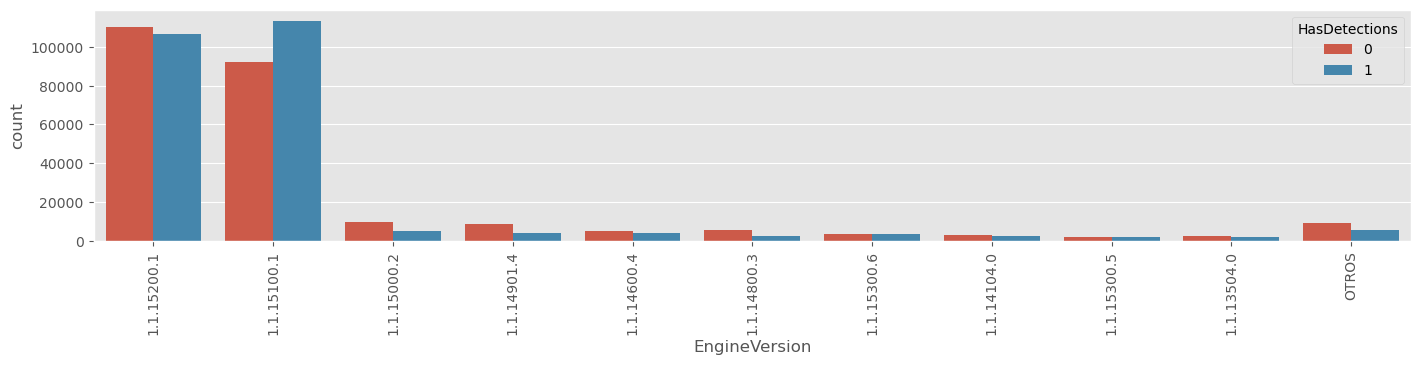

In [35]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='EngineVersion', hue='HasDetections')

### 3.2 Transformacion de atribulos

In [43]:
df=pd.get_dummies(df)
df.head().T

,0,1,2,3,4
RtpStateBitfield,7,7,7,7,7
AVProductStatesIdentifier,-57,-57,-67,-57,-122
AVProductsInstalled,1,1,2,1,2
AVProductsEnabled,1,1,1,1,1
OrganizationIdentifier,-1,-1,27,27,27
OsBuild,-18,-18,90,-18,-18
IsProtected,1,1,1,1,1
IeVerIdentifier,-119,-119,74,-119,-119
OEMNameIdentifier,-93,54,-98,13,-93
ProcessorManufacturerIdentifier,5,5,5,5,1


## 4. Modelizacion

In [44]:
#Train -> 75% Test -> 25%
train, test = model_selection.train_test_split(df, test_size = 0.25)
len(train) , len(test)

(375000, 125000)

In [45]:
#todo el dataset para el crossvalitadion
df_x = df.drop('HasDetections', axis=1)
df_y = df[['HasDetections']]

In [46]:
#tratar X Y con variable target para en entreno
train_df_X = train.drop('HasDetections', axis=1)
train_df_Y = train[['HasDetections']]

In [47]:
#tratar X Y con variable target para el test
test_df_X = test.drop('HasDetections', axis=1)
test_df_Y = test[['HasDetections']]

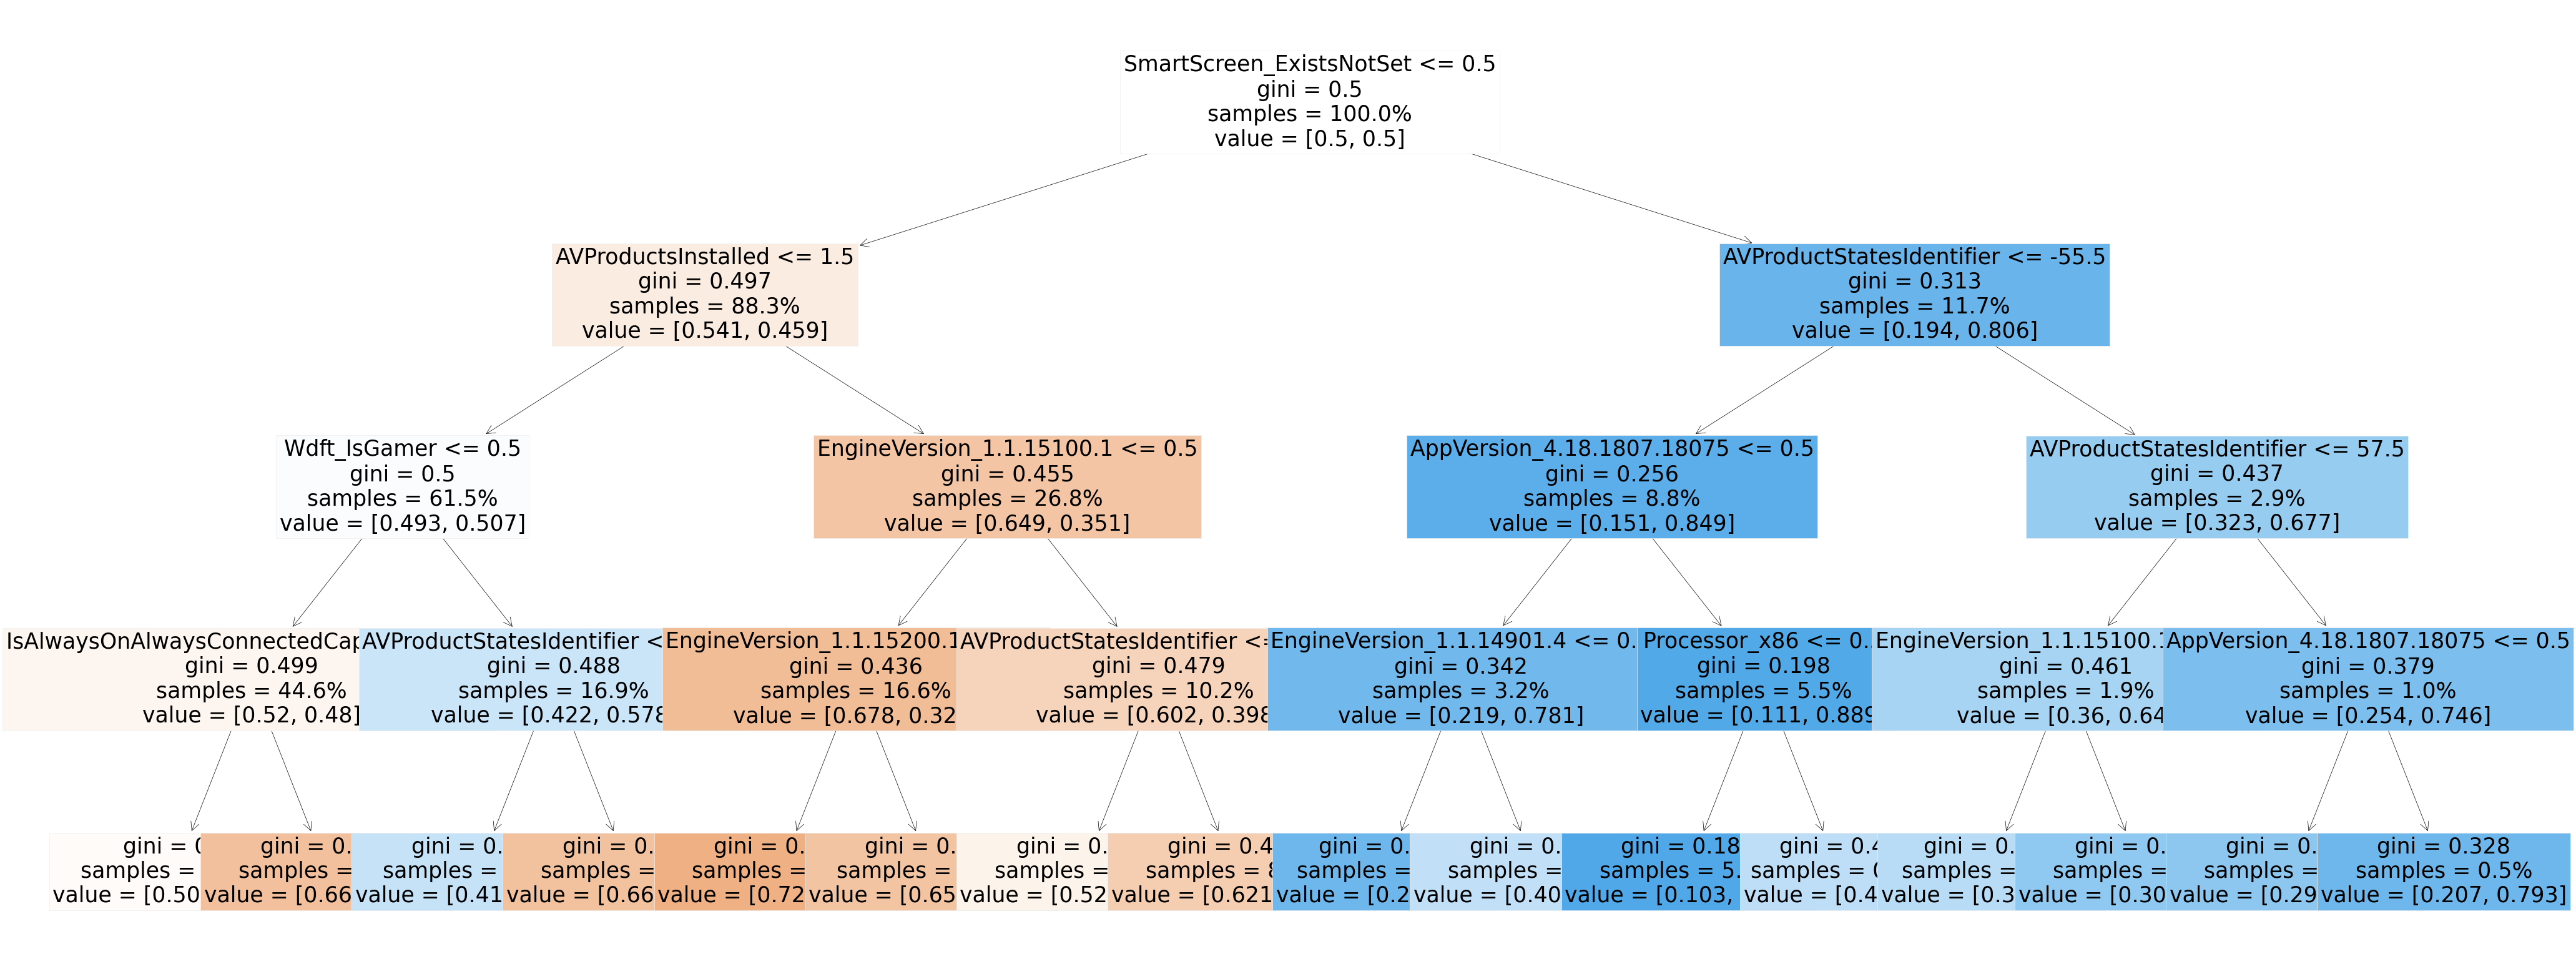

In [52]:
#Primer analisis con DecisionTree

arbol=DecisionTreeClassifier(max_depth=4)
arbol.fit(train_df_X, train_df_Y)
fig, ax = plt.subplots(figsize=(50,20))
plot_tree(
    arbol, 
    ax = ax, 
    fontsize = 25,
    proportion=True,
    filled = True, 
    feature_names = train_df_X.columns)
plt.show()

/Users/usuario/opt/anaconda3/envs/Nuclio/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x1000 with 0 Axes>

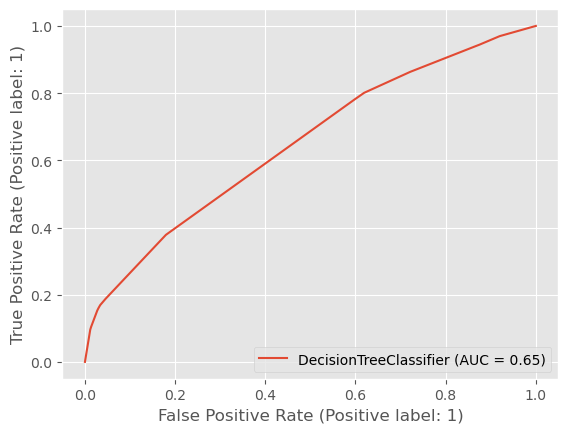

In [53]:
plt.figure(figsize=(20,10))
plot_roc_curve(arbol, test_df_X, test_df_Y)
plt.show()

In [19]:
# hiperparametros para cada modelo

models = {
    'decision_tree': [
        {
            'max_depth': randint(2, 6),
            'min_samples_leaf': randint(2, 6),
            'min_samples_split': randint(2, 6)
        }, 
        DecisionTreeClassifier()
    ],
    'random_forest': [
        {
            'max_depth': randint(2, 6),
            'n_estimators': randint(100, 500),
            'min_samples_leaf': randint(2, 6),
            'min_samples_split': randint(2, 6),
        }, 
        RandomForestClassifier()
    ],
    'gradient_boosting': [
        {
            'min_samples_leaf': randint(2, 6),
            'min_samples_split': randint(2, 6),
            'learning_rate': uniform(loc=0.01, scale=0.2), 
            'max_depth': randint(2, 6),
            'n_estimators': randint(100, 500),
            'n_iter_no_change': randint(5, 10),
            'tol': uniform(loc=0.001, scale=0.01)
        }, 
        GradientBoostingClassifier()
    ]
}

In [20]:
#los mejores parametros para cada modelo -->57min 

best_params = dict()
best_score = dict()
for model_name, l_model in models.items():
    print(model_name)
    params, model = l_model
    random_search = model_selection.RandomizedSearchCV(
        model, 
        param_distributions=params, 
        #random_state=0, #semilla para el random
        n_iter=2, #numero de iteracciones
        cv=10, #numero de combinaciones de parametros
        verbose=1, 
        n_jobs=-1,#numero de CPUs 
        return_train_score=True,
        scoring = 'roc_auc'
    )
    random_search.fit(df_x , np.ravel(df_y ))
    best_params[model_name] = random_search.best_params_
    best_score[model_name] = random_search.best_score_

decision_tree
Fitting 10 folds for each of 2 candidates, totalling 20 fits
random_forest
Fitting 10 folds for each of 2 candidates, totalling 20 fits
gradient_boosting
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [21]:
best_params , best_score

({'decision_tree': {'max_depth': 5,
   'min_samples_leaf': 3,
   'min_samples_split': 5},
  'random_forest': {'max_depth': 3,
   'min_samples_leaf': 5,
   'min_samples_split': 5,
   'n_estimators': 297},
  'gradient_boosting': {'learning_rate': 0.040062870596426894,
   'max_depth': 4,
   'min_samples_leaf': 4,
   'min_samples_split': 5,
   'n_estimators': 412,
   'n_iter_no_change': 9,
   'tol': 0.004968560152172355}},
 {'decision_tree': 0.6585848689389059,
  'random_forest': 0.6628982255000054,
  'gradient_boosting': 0.6723835137491773})

In [55]:
#entrar el mejor modelo, con los mejores parametros --> 4min 

best_model = GradientBoostingClassifier(**best_params['gradient_boosting'])  
best_model.fit(train_df_X, np.ravel(train_df_Y))

GradientBoostingClassifier(learning_rate=0.040062870596426894, max_depth=4,
                           min_samples_leaf=4, min_samples_split=5,
                           n_estimators=412, n_iter_no_change=9,
                           tol=0.004968560152172355)

/Users/usuario/opt/anaconda3/envs/Nuclio/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x1000 with 0 Axes>

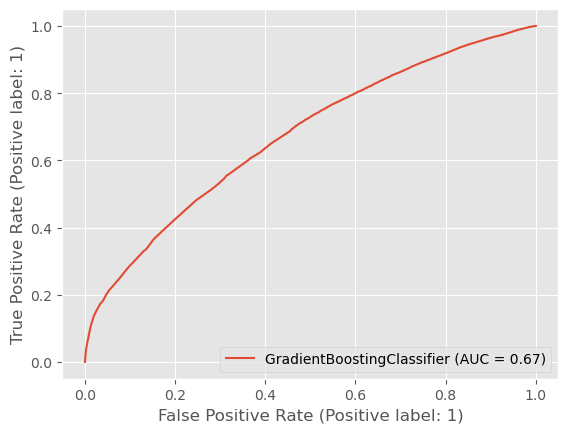

In [57]:
plt.figure(figsize=(20,10))
plot_roc_curve(best_model, test_df_X, test_df_Y)
plt.show()

## 5 Evaluacion

### Evaluacion con dataset de entreno

In [58]:
y_train_pred = pd.DataFrame(best_model.predict(train_df_X), index=train_df_Y.index, columns=['DelayPrediction'])
y_train_pred.head() 

,DelayPrediction
384282,1
149182,0
2457,0
307415,0
147551,0


In [59]:
results_df = train_df_Y.join(y_train_pred, how= 'inner')
results_df.head() 

,HasDetections,DelayPrediction
384282,0,1
149182,1,0
2457,1,0
307415,0,0
147551,1,0


In [60]:
results_df['Success'] = (results_df['HasDetections'] == results_df['DelayPrediction']).astype(int)
results_df.head()

,HasDetections,DelayPrediction,Success
384282,0,1,0
149182,1,0,0
2457,1,0,0
307415,0,0,1
147551,1,0,0


In [61]:
#aciertos -->
results_df['Success'].sum()/results_df['Success'].count()*100

62.025866666666666

In [62]:
confusion_matrix = pd.crosstab(results_df['HasDetections'], results_df['DelayPrediction'])
confusion_matrix.head()

DelayPrediction,0,1
HasDetections,,
0,127988,59512
1,82891,104609


In [63]:
best_model.score(test_df_X, test_df_Y)*100

62.016000000000005

### Evaluacion con modelo de test

In [64]:
y_test_pred = pd.DataFrame(best_model.predict(test_df_X), index=test_df_Y.index, columns=['DelayPrediction'])
y_test_pred.head() 

,DelayPrediction
40715,0
169171,1
89130,0
459855,1
269853,0


In [65]:
results_df_test = test_df_Y.join(y_test_pred, how= 'inner')
results_df_test['Success'] = (results_df_test['HasDetections'] == results_df_test['DelayPrediction']).astype(int)
results_df_test.head()

,HasDetections,DelayPrediction,Success
40715,0,0,1
169171,0,1,0
89130,1,0,0
459855,1,1,1
269853,1,0,0


In [74]:
confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['HasDetections'],results_df_test['DelayPrediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['HasDetections'], results_df_test['DelayPrediction'])
Precision_m_test = metrics.precision_score(results_df_test['HasDetections'],results_df_test['DelayPrediction'])
Recall_m_test = metrics.recall_score(results_df_test['HasDetections'],results_df_test['DelayPrediction'])
F1_m_test = metrics.f1_score(results_df_test['HasDetections'],results_df_test['DelayPrediction'])

print(f"Confusion matrix: , {confusion_matrix_m_test} \nAccuracy: , {Accuracy_m_test} \nPrecision: , {Precision_m_test} \nRecall: , {Recall_m_test} \nF1: {F1_m_test}")


Confusion matrix: , [[42821 19726]
 [27754 34699]] 
Accuracy: , 0.62016 
Precision: , 0.637556270096463 
Recall: , 0.5556018125630474 
F1: 0.5937644381320694


# Conclusion

- se han probado varias combinaciones de variables (la primera de apenas 20 con un AUC de 0,66) 
- se han probado varias combinaciones de hiperparametros
- se ha agrupado de forma diferente cada variable, mas agrupado y mas desagrupado, sin cambiar demasiado el resultado, aumentando el tiempo de entrenamiento.

Para la decision de que variables incluir y descartar, al no conocer las variables de negocio, he tomado mis decisiones logicas (que pueden no ser las mejores o mas acertadas) , como por ejemplo descartar muchas propriedades de hardware (census_ ... )

No se ha buscado proyectos en internet, ni se ha copiado codigo.